In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from esem.utils import plot_results, prettify_plot, add_121_line, leave_one_out
from esem import rf_model, gp_model
from sklearn.metrics import mean_squared_error
from scipy import stats

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Define a dataset with 1,000 samples

In [41]:
# Size of dataset
n_sample = 100

# Build dataset
x1 = np.random.uniform(low=0.0, high=10, size=n_sample)
x2 = np.random.uniform(low=0.0, high=10, size=n_sample)
x3 = np.random.uniform(low=0.0, high=10, size=n_sample)
x4 = np.random.uniform(low=0.0, high=10, size=n_sample)
X = np.transpose(np.stack([x1, x2, x3, x4]))
Y = 2 * X[:,0] +  np.sin(X[:,1]) + np.log(X[:,2]) + np.sqrt(X[:,3])

# Build testing and training dataset
inds_test = np.arange(0, int(n_sample/5))
inds_train = np.arange(int(n_sample/5), n_sample)

# Define training data set

In [42]:
X_train = X[inds_train, :]
Y_train = Y[inds_train]

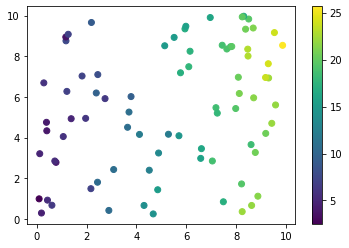

In [43]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.colorbar()

# Train model

In [44]:
%%time
rf_model = rf_model(X_train, Y_train)
rf_model.train()

CPU times: user 104 ms, sys: 2.94 ms, total: 107 ms
Wall time: 109 ms


In [45]:
%%time
gp_model = gp_model(X_train, Y_train)
gp_model.train()

CPU times: user 655 ms, sys: 9.8 ms, total: 665 ms
Wall time: 676 ms


# Build a testing dataset

In [46]:
X_test = X[inds_test, :]

# Inference

In [47]:
%%time
Y_rf_test = rf_model.predict(X_test)[0]

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 14.1 ms


In [48]:
%%time
Y_gp_test = gp_model.predict(X_test)[0]

CPU times: user 39 ms, sys: 0 ns, total: 39 ms
Wall time: 39 ms


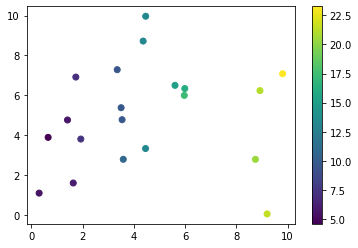

In [49]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_rf_test)
plt.colorbar()

# Perform analysis

In [50]:
def calc_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

Text(0.5, 1.0, 'Slope = 0.9133187357974878\nR^2 = 0.9351962950345643,\np = 3.852378197659919e-12,\nRMSE = 1.5812659358889065,\nN = 100')

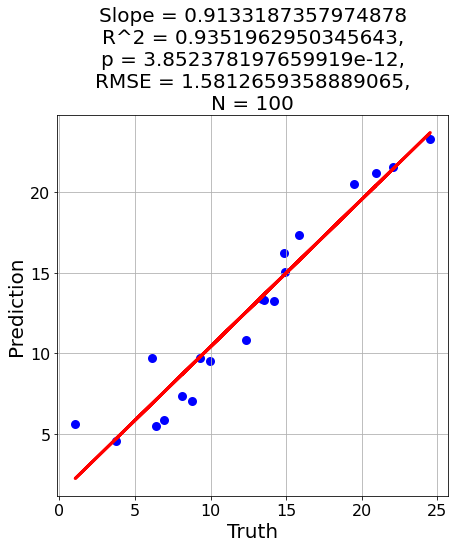

In [51]:
# Random Forest 
x = Y[inds_test] # Truth
y = Y_rf_test # Prediction
lin_reg = stats.linregress(x, y)
rmse = calc_rmse(y, x)

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='b', linewidth=3)
plt.plot(x, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line', linewidth=3)
plt.grid()
plt.xlabel("Truth", fontsize=20)
plt.ylabel("Prediction", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Slope = " + str(lin_reg.slope) + \
          "\nR^2 = " + str(lin_reg.rvalue**2) + \
          ",\np = " + str(lin_reg.pvalue) + \
          ",\nRMSE = " + str(rmse) + \
          ",\nN = " + str(n_sample),
         fontsize=20)

Text(0.5, 1.0, 'Slope = 0.9682182264384864\nR^2 = 0.9946314867801851,\np = 6.88672971021878e-22,\nRMSE = 0.5111105538198359,\nN = 100')

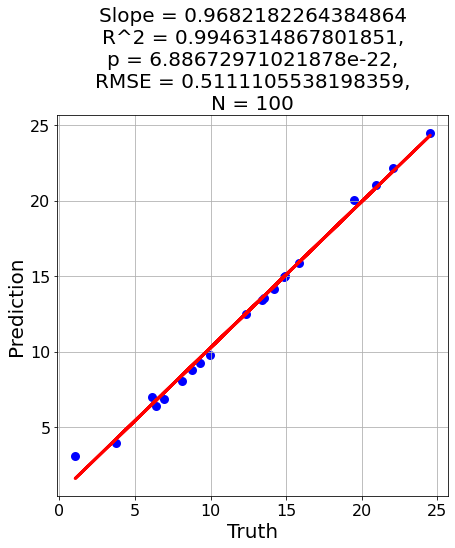

In [52]:
# Gaussian processes
x = Y[inds_test] # Truth
y = Y_gp_test # Prediction
lin_reg = stats.linregress(x, y)
rmse = calc_rmse(y, x)

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='b', linewidth=3)
plt.plot(x, lin_reg.intercept + lin_reg.slope*x, 'r', label='fitted line', linewidth=3)
plt.grid()
plt.xlabel("Truth", fontsize=20)
plt.ylabel("Prediction", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Slope = " + str(lin_reg.slope) + \
          "\nR^2 = " + str(lin_reg.rvalue**2) + \
          ",\np = " + str(lin_reg.pvalue) + \
          ",\nRMSE = " + str(rmse) + \
          ",\nN = " + str(n_sample),
         fontsize=20)